In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

print(torch.__version__)

2.0.1+cu117


In [2]:
device = "cuda" if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

Using device: cuda


In [3]:
!nvidia-smi

Sat Nov  4 00:47:24 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.54.03              Driver Version: 535.54.03    CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce MX130           Off | 00000000:01:00.0 Off |                  N/A |
| N/A   51C    P8              N/A / 200W |      6MiB /  2048MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
#Createn some data\


weight = 0.3
bias = 0.1

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.1000],
         [0.1060],
         [0.1120],
         [0.1180],
         [0.1240],
         [0.1300],
         [0.1360],
         [0.1420],
         [0.1480],
         [0.1540]]))

In [5]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [6]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
    plt.figure(figsize=(10, 7))

  # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
    plt.legend(prop={"size": 14});

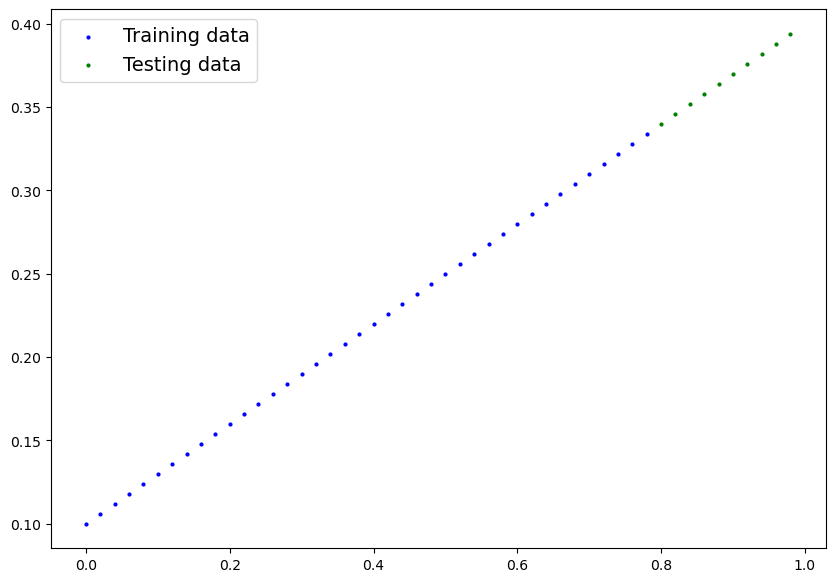

In [7]:
plot_predictions(X_train, y_train, X_test, y_test)

In [8]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        # USe nn.Linear for creating model parameters
        self.linear_layer = nn.Linear(in_features=1, out_features=1)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegression()
model_1, model_1.state_dict()

(LinearRegression(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [9]:
# sset the model to use target device 
next(model_1.parameters()).device

device(type='cpu')

In [10]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [11]:
# loss function
# optimizer
# training loop

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_1.parameters(), lr=0.01)


In [12]:
import numpy as np
torch.manual_seed(42)
Epochs = 200

# put data on the target device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)


for epoch in range(Epochs):
    
    model_1.train()
    
    #1 foraward pass
    
    y_pred = model_1(X_train)
    
    # 2. Calculate loss
    
    training_loss = loss_fn(y_pred, y_train)
#     current_loss = loss_fn(y_pred, y_train)
    
    # 3. zero the gradients
    
    optimizer.zero_grad()
    
    # 4. perform back propagation
    
    training_loss.backward()
    
    # 5. optimization
    
    optimizer.step()
    
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        
        test_loss = loss_fn(test_pred, y_test)
        
    if epoch % 10 == 0:
        print(f'Epoch: {epoch} | Loss: {training_loss} | Test Loss: {test_loss}')


Epoch: 0 | Loss: 0.911177933216095 | Test Loss: 1.1299762725830078
Epoch: 10 | Loss: 0.7959680557250977 | Test Loss: 0.9952663779258728
Epoch: 20 | Loss: 0.6807581782341003 | Test Loss: 0.8605566024780273
Epoch: 30 | Loss: 0.5655483603477478 | Test Loss: 0.7258467078208923
Epoch: 40 | Loss: 0.4503384530544281 | Test Loss: 0.5911369323730469
Epoch: 50 | Loss: 0.3351285755634308 | Test Loss: 0.45642709732055664
Epoch: 60 | Loss: 0.21991868317127228 | Test Loss: 0.32171720266342163
Epoch: 70 | Loss: 0.10470864921808243 | Test Loss: 0.18700723350048065
Epoch: 80 | Loss: 0.03314550593495369 | Test Loss: 0.08882324397563934
Epoch: 90 | Loss: 0.026351824402809143 | Test Loss: 0.06310085207223892
Epoch: 100 | Loss: 0.022874142974615097 | Test Loss: 0.05276774242520332
Epoch: 110 | Loss: 0.019435811787843704 | Test Loss: 0.04449528828263283
Epoch: 120 | Loss: 0.01600063219666481 | Test Loss: 0.036909736692905426
Epoch: 130 | Loss: 0.012570987455546856 | Test Loss: 0.028637295588850975
Epoch: 14

In [13]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.3091]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.1040], device='cuda:0'))])

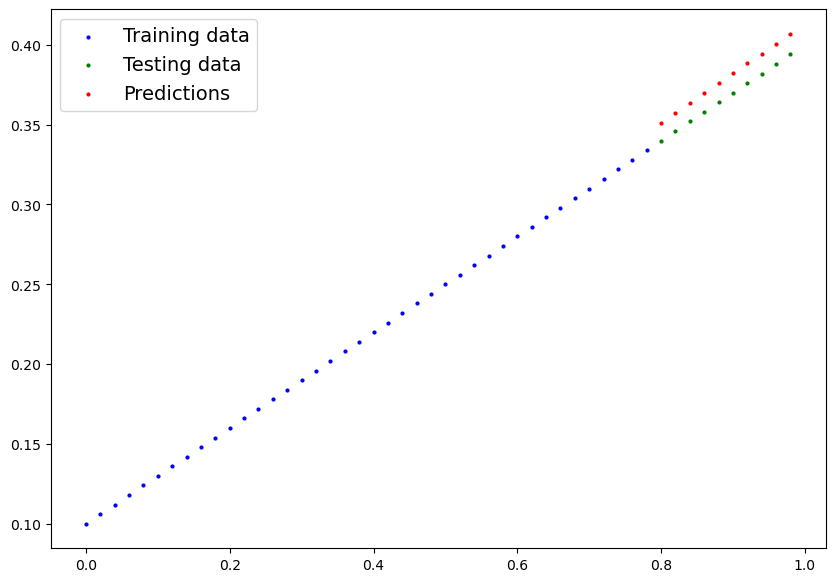

In [14]:
plot_predictions(predictions=test_pred.cpu())

In [27]:
torch.save(model_1, "models/01_pytorch_workflow.pth")

In [28]:
my_model = torch.load("models/01_pytorch_workflow.pth")

In [29]:
my_model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.3091]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.1040], device='cuda:0'))])

In [33]:
### saving and loading a trained model 
from pathlib import Path


#create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)


 # create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH =  MODEL_PATH/MODEL_NAME
    
    #save the mdoel state dict
    
print(f"SAving Model to: {MODEL_SAVE_PATH}")
    
torch.save(obj=model_1.state_dict(), f= MODEL_SAVE_PATH)

SAving Model to: models/01_pytorch_workflow_model_1.pth


In [34]:
loaded_model= LinearRegression()
loaded_model.load_state_dict(torch.load(f="models/01_pytorch_workflow_model_1.pth"))

<All keys matched successfully>

In [38]:

loaded_model.state_dict()
loaded_model.to(device)

LinearRegression(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [36]:
new_loaded = torch.load("models/01_pytorch_workflow.pth")

In [37]:
# new_loaded
new_loaded.state_dict()
new_loaded.to(device)

LinearRegression(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [39]:
next(loaded_model.parameters()).device

device(type='cuda', index=0)

In [40]:
loaded_model.eval()
with torch.inference_mode():
    y_predss = loaded_model(X_test)
y_predss

tensor([[0.3513],
        [0.3575],
        [0.3637],
        [0.3698],
        [0.3760],
        [0.3822],
        [0.3884],
        [0.3946],
        [0.4008],
        [0.4069]], device='cuda:0')

In [41]:
test_pred == y_predss

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')